In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
train_images.shape

In [ ]:
test_images.shape

In [3]:
import imp; import utils; imp.reload(utils); from utils import *; import numpy as np
import pandas as pd; import math; import time; from copy import deepcopy;
import matplotlib.pyplot as plt; import warnings; from matplotlib import rc;
warnings.filterwarnings("ignore")
rc('text', usetex = True)
#rc('font', **font)
plt.rcParams.update({'font.size': 18})
plt.rcParams.update({'font.size': 24})
from matplotlib import rc
font = {'family' : 'serif',}
rc('font', **font)

In [4]:
result = model.predict(test_images)
for i in testIndex:
    print(np.argmax(result[i]), test_labels[i])

NameError: name 'model' is not defined

NameError: name 'testIndex' is not defined

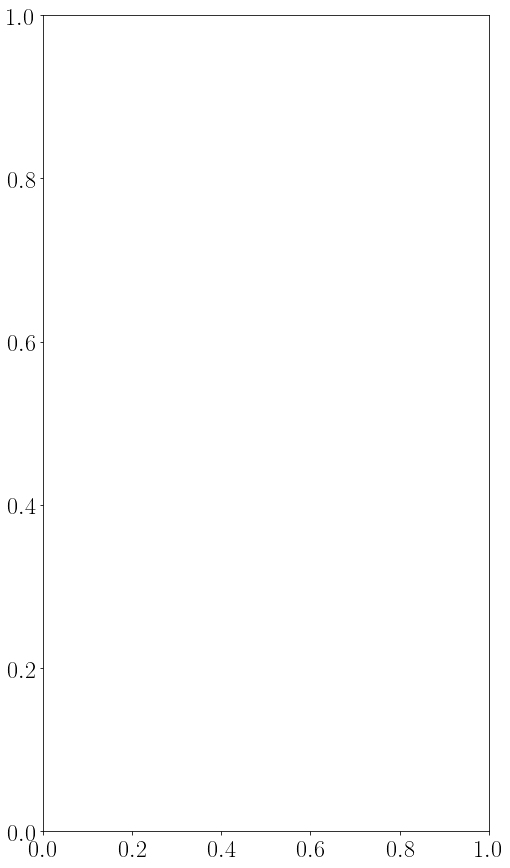

In [5]:
# from random import randrange
# testIndex =[]
# for i in range(20):
#     testIndex.append(randrange(10000))
    
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

fig, ax = plt.subplots(figsize=(8,15))
for i, val in enumerate(testIndex):
    plt.subplot(5,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[val])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
#     plt.xlabel(class_names[test_labels[val][0]])
    plt.subplots_adjust(left=None, bottom=None, right=None, top=2, wspace=1, hspace=7)
    plt.tight_layout()
plt.text(-150,-5, "Python:")
plt.text(-150,-15, "SMART:")


plt.text(-150,-65, "Python:")
plt.text(-150,-75, "SMART:")

# plt.text(-150,-35, "Python:")
# plt.text(-150,-45, "SMART:")

plt.text(-150,-125, "Python:")
plt.text(-150,-135, "SMART:")


plt.text(-150,-185, "Python:")
plt.text(-150,-195, "SMART:")


plt.text(-150,55, "Python:")
plt.text(-150,45, "SMART:")


for i in range(4):
    for j in range(5):
        plt.text(-110 + i * 38.5, -185 + j * 60, "%s"%(class_names[int(np.argmax(result[testIndex[i + j * 4]]))]))
        plt.text(-110 + i * 38.5, -195 + j * 60, "%s"%(class_names[int(np.argmax(result[testIndex[i + j * 4]]))]))
    

plt.savefig('cifar.png', dpi = 300) 
plt.show()

In [ ]:
def calc_MACs_in_Conv():
    K = 3
    C_in = 3
    C_out = 32
    H_out = 30
    W_out = 30   
    return (K**2) * C_in * H_out * W_out * C_out 

In [ ]:
def calc_MACs_in_Conv(K, C_in, C_out, H_out, W_out): 
    return (K**2) * C_in * H_out * W_out * C_out 

In [ ]:
# first conv
conv1 = calc_MACs_in_Conv(3, 3, 32, 30, 30)

In [ ]:
# second conv
conv2 = calc_MACs_in_Conv(3, 32, 32, 28, 28)

In [ ]:
def calc_MACs_in_FC(in_n, out_n): 
    return in_n * out_n 

In [ ]:
# first fc
fc1 = calc_MACs_in_FC(6272, 128)

In [ ]:
# second fc
fc2 = calc_MACs_in_FC(128, 10)

In [ ]:
conv1 + conv2 + fc1 + fc2

In [ ]:
# accuracy %71

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), use_bias=False,padding='valid', activation='relu', input_shape=(32,32,3)))
# model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), use_bias=False,padding='valid', activation='relu'))
# model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.Dense(128, use_bias=False,activation='relu'))
# model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, use_bias=False,activation='softmax'))    # num_classes = 10

In [9]:
import tensorflow_model_optimization as tfmot

quantize_model = tfmot.quantization.keras.quantize_model

# q_aware stands for for quantization aware.
q_aware_model = quantize_model(model)

# `quantize_model` requires a recompile.
q_aware_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

q_aware_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
quantize_layer_1 (QuantizeLa (None, 32, 32, 3)         3         
_________________________________________________________________
quant_conv2d_2 (QuantizeWrap (None, 30, 30, 32)        931       
_________________________________________________________________
quant_conv2d_3 (QuantizeWrap (None, 28, 28, 32)        9283      
_________________________________________________________________
quant_max_pooling2d_1 (Quant (None, 14, 14, 32)        1         
_________________________________________________________________
quant_dropout_2 (QuantizeWra (None, 14, 14, 32)        1         
_________________________________________________________________
quant_flatten_1 (QuantizeWra (None, 6272)              1         
_________________________________________________________________
quant_dense_2 (QuantizeWrapp (None, 128)              

In [10]:
history = q_aware_model.fit(train_images, train_labels, epochs=20, batch_size=128,
                    validation_data=(test_images, test_labels))

Epoch 1/20
391/391 [==============================] - 47s 119ms/step - loss: 2.1311 - accuracy: 0.3247 - val_loss: 2.0067 - val_accuracy: 0.4588
Epoch 2/20
391/391 [==============================] - 43s 110ms/step - loss: 2.0179 - accuracy: 0.4429 - val_loss: 1.9535 - val_accuracy: 0.5084
Epoch 3/20
391/391 [==============================] - 38s 97ms/step - loss: 1.9670 - accuracy: 0.4943 - val_loss: 1.9087 - val_accuracy: 0.5548
Epoch 4/20
391/391 [==============================] - 44s 111ms/step - loss: 1.9388 - accuracy: 0.5218 - val_loss: 1.8953 - val_accuracy: 0.5654
Epoch 5/20
391/391 [==============================] - 39s 100ms/step - loss: 1.9164 - accuracy: 0.5443 - val_loss: 1.8782 - val_accuracy: 0.5835
Epoch 6/20
391/391 [==============================] - 37s 94ms/step - loss: 1.8971 - accuracy: 0.5636 - val_loss: 1.8706 - val_accuracy: 0.5897
Epoch 7/20
391/391 [==============================] - 40s 103ms/step - loss: 1.8853 - accuracy: 0.5745 - val_loss: 1.8510 - val_accu

In [11]:
# baseline_model_accuracy = model.evaluate(test_images, test_labels, verbose=0)

q_aware_model_accuracy = q_aware_model.evaluate(test_images, test_labels, verbose=0)

# print('Baseline test accuracy:', baseline_model_accuracy)
print('Quant test accuracy:', q_aware_model_accuracy)

Quant test accuracy: [1.7958474159240723, 0.6626999974250793]


In [12]:
converter = tf.lite.TFLiteConverter.from_keras_model(q_aware_model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

quantized_tflite_model = converter.convert()

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /tmp/tmp9rsvqc37/assets


In [14]:
import numpy as np

def evaluate_model(interpreter):
  input_index = interpreter.get_input_details()[0]["index"]
  output_index = interpreter.get_output_details()[0]["index"]

  # Run predictions on every image in the "test" dataset.
  prediction_digits = []
  for i, test_image in enumerate(test_images):
    if i % 1000 == 0:
      print('Evaluated on {n} results so far.'.format(n=i))
    # Pre-processing: add batch dimension and convert to float32 to match with
    # the model's input data format.
    test_image = np.expand_dims(test_image, axis=0).astype(np.float32)
    interpreter.set_tensor(input_index, test_image)

    # Run inference.
    interpreter.invoke()

    # Post-processing: remove batch dimension and find the digit with highest
    # probability.
    output = interpreter.tensor(output_index)
    digit = np.argmax(output()[0])
    prediction_digits.append(digit)

  print('\n')
  # Compare prediction results with ground truth labels to calculate accuracy.
  prediction_digits = np.array(prediction_digits)
  accuracy = (prediction_digits == test_labels).mean()
  return accuracy

In [15]:
interpreter = tf.lite.Interpreter(model_content=quantized_tflite_model)
interpreter.allocate_tensors()

test_accuracy = evaluate_model(interpreter)

print('Quant TFLite test_accuracy:', test_accuracy)
print('Quant TF test accuracy:', q_aware_model_accuracy)

Evaluated on 0 results so far.
Evaluated on 1000 results so far.
Evaluated on 2000 results so far.
Evaluated on 3000 results so far.
Evaluated on 4000 results so far.
Evaluated on 5000 results so far.
Evaluated on 6000 results so far.
Evaluated on 7000 results so far.
Evaluated on 8000 results so far.
Evaluated on 9000 results so far.


Quant TFLite test_accuracy: 0.1
Quant TF test accuracy: [1.7958474159240723, 0.6626999974250793]


In [ ]:
testIndex

In [ ]:
# from random import randrange
# testIndex =[]
# for i in range(20):
#     testIndex.append(randrange(10000))
result = model.predict(test_images)
acc = 20
for i in testIndex:
    print(np.argmax(result[i]), test_labels[i][0])
    if np.argmax(result[i]) != test_labels[i][0]:
        acc -= 1
        
print(acc / 20 * 100)

In [ ]:
acc

In [ ]:
Sequential()

In [ ]:
import numpy as np
import tensorflow as tf
import math
model.summary()

pred_digital = []
pred_analog  = []
ad = ['analog', 'digital']

for sim in ad:
    for i in range(5, 10):
        inputs = train_images[i]
        
        (ix, iy, iz) = inputs.shape
        print("input size", inputs.shape)
        # ------------------------------------------------------------------
        if sim == 'analog':
            ans = conv2dAnalog(inputs, model.layers[0].get_weights()[0])
        elif sim == 'digital':
            ans = conv2d(inputs, model.layers[0].get_weights()[0])
            
        ans = tf.keras.activations.relu(ans)
        ans = ans.numpy()
        # ------------------------------------------------------------------
        model_batch = Sequential()
        model_batch.add(layers.BatchNormalization())
        ans = model_batch.predict(ans)        
        # ------------------------------------------------------------------
#         if sim == 'analog':
#             ans = conv2dAnalog(ans, model.layers[2].get_weights()[0])
#         elif sim == 'digital':
#             ans = conv2d(ans, model.layers[2].get_weights()[0])
            
#         ans = tf.keras.activations.relu(ans)
#         ans = ans.numpy()
#         # ------------------------------------------------------------------
#         model_batch = Sequential()
#         model_batch.add(layers.BatchNormalization())
#         ans = model_batch.predict(ans)   
        # ------------------------------------------------------------------
#         model_max = Sequential()
#         model_max.add(layers.MaxPooling2D(pool_size=(2,2)))
#         (x, y, z) = ans.shape
#         ans = ans.reshape(1, x, y, z)
#         ans = model_max.predict(ans)   
#         # ------------------------------------------------------------------
#         model_drop = Sequential()
#         model_drop.add(layers.Dropout(0.3))
#         ans = model_drop.predict(ans) 
#         print('after drop',ans.shape)
        # ------------------------------------------------------------------
        model_flatten = Sequential()
        model_flatten.add(layers.Flatten())
        (m, n) = model_flatten.predict(ans).shape
        ans = model_flatten.predict(ans).reshape(1, m * n)
        print('after flatten',ans.shape)
        # ------------------------------------------------------------------
#         if sim == 'analog':
#             ans = fc(ans, model.layers[5].get_weights()[0])
#         elif sim == 'digital':
#             ans = fc(ans, model.layers[5].get_weights()[0])        
#         # ------------------------------------------------------------------
#         model_batch = Sequential()
#         model_batch.add(layers.BatchNormalization())
#         ans = model_batch.predict(ans)           
#         # ------------------------------------------------------------------
#         model_drop = Sequential()
#         model_drop.add(layers.Dropout(0.5))
#         ans = model_drop.predict(ans)            
        # ------------------------------------------------------------------                          
        print(inputs.shape)
        if sim == 'analog':
            ans = fc(ans, model.layers[3].get_weights()[0])
        elif sim == 'digital':
            ans = fc(ans, model.layers[3].get_weights()[0])
        # ------------------------------------------------------------------  
        if sim == 'analog':
            pred_analog.append(np.argmax(ans))  
        elif sim == 'digital':
            pred_digital.append(np.argmax(ans))  
            
            
for i in range(len(pred_digital)):
    print(pred_digital[i], pred_analog[i])

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '0' 

In [ ]:
for i in range(len(pred_analog)):
    print(pred_analog[i], pred_digital[i])

In [ ]:
pred = []
for i in model.predict(test_images):
    print(np.argmax(i), end = ' ')

In [ ]:
model.layers[7].get_weights()[0].shape

In [ ]:
model.layers[6].get_weights()[0].shape

In [ ]:
model.layers

In [ ]:
model.save('model_75%.ml')

In [ ]:
model.layers

In [ ]:
ans4[0][0]

In [ ]:
 ans5 = model2.predict(ans4)

In [ ]:
def conv2d(inputO_, kernelO_):
    input_ = deepcopy(inputO_)
    kernel_ = deepcopy(kernelO_)
    
    (ix, iy, iz) = input_.shape
    (kx, ky, kz, kc) = kernel_.shape
    
#     iOut = np.zeros(ix* iy* iz)
#     iOut = iOut.reshape(ix, iy, iz)
    
#     iKernel = np.zeros(kx* ky* kz* kc)
#     iKernel = iKernel.reshape(kx, ky, kz, kc)
    
    # ********************* quantizing the input image and kernels ***************************
    max_ = np.amax(abs(input_))
    for ix_ in range(ix):
        for iy_ in range(iy):
            for iz_ in range(iz):
                input_[ix_][iy_][iz_] = int(np.floor((abs(input_[ix_][iy_][iz_] / max_)) * (2 ** res - 1) )) * np.sign(input_[ix_][iy_][iz_])

                    
    max_ = np.amax(abs(kernel_))
    for kx_ in range(kx):
        for ky_ in range(ky):
            for kz_ in range(kz):
                for kc_ in range(kc):
                    kernel_[kx_][ky_][kz_][kc_] = int(np.floor((abs(kernel_[kx_][ky_][kz_][kc_] / max_)) * (2 ** res -1 )))  * np.sign(kernel_[kx_][ky_][kz_][kc_])


    #print(kernel_)
    #print(input_)
    ans = np.zeros(kc * (iy - ky +1) * (iy - ky +1))
    ans = ans.reshape((iy - ky +1), (iy - ky +1), kc)
    for kc_ in range(kc):
        for kz_ in range(kz):
            # 32 - 3 + 1 = 30 - 29 + 2 = 31
            for i in range((iy - ky + 1)):
                for j in range((iy - ky + 1)):
                        for ky_ in range(ky):
                            for kx_ in range(kx):
                                    ans[i][j][kc_] += input_[kx_ + i][ky_ + j][kz_] * kernel_[kx_][ky_][kz_][kc_]
                                    
                                    
    max_ = np.amax(abs(ans))            
    for kc_ in range(kc):
        for i in range((iy - ky + 1)):
            for j in range((iy - ky + 1)):
                ans[i][j][kc_] = int(np.floor((abs(ans[i][j][kc_] / max_)) * (2 ** res - 1) )) * np.sign(ans[i][j][kc_])
    return ans

res = 4

import copy 
from copy import deepcopy


def conv2dAnalog(inputO_, kernelO_):
    input_ = deepcopy(inputO_)
    kernel_ = deepcopy(kernelO_)
    
    (ix, iy, iz) = input_.shape
    (kx, ky, kz, kc) = kernel_.shape
    
    iOut = np.zeros(ix* iy* iz)
    iOut = iOut.reshape(ix, iy, iz)
    
    iKernel = np.zeros(kx* ky* kz* kc)
    iKernel = iKernel.reshape(kx, ky, kz, kc)
    
    # ********************* quantizing the input image and kernels ***************************
    max_ = np.amax(abs(input_))
    for ix_ in range(ix):
        for iy_ in range(iy):
            for iz_ in range(iz):
                input_[ix_][iy_][iz_] = int(np.floor((abs(input_[ix_][iy_][iz_] / max_)) * (2 ** res - 1) )) * np.sign(input_[ix_][iy_][iz_])
                if input_[ix_][iy_][iz_] == 0:
                    iOut[ix_][iy_][iz_] = 0.9
                else:
                    iOut[ix_][iy_][iz_]  = (abs(input_[ix_][iy_][iz_]) * 0.04 + 0.9) * np.sign(input_[ix_][iy_][iz_])  
    #print(iOut)
    max_ = np.amax(abs(kernel_))
    for kx_ in range(kx):
        for ky_ in range(ky):
            for kz_ in range(kz):
                for kc_ in range(kc):
                    kernel_[kx_][ky_][kz_][kc_] = int(np.floor((abs(kernel_[kx_][ky_][kz_][kc_] / max_)) * (2 ** res -1 )))  * np.sign(kernel_[kx_][ky_][kz_][kc_])
                    if kernel_[kx_][ky_][kz_][kc_] == 0:
                        iKernel[kx_][ky_][kz_][kc_] = 1.08
                    else:
                        iKernel[kx_][ky_][kz_][kc_]  = (abs(kernel_[kx_][ky_][kz_][kc_])  * 0.02 + 1.08) * np.sign(kernel_[kx_][ky_][kz_][kc_])                                  
   # ***************************    convert to analog values  ********************************


    ansP = np.zeros(kc * (iy - ky +1) * (iy - ky +1))
    ansP = ansP.reshape((iy - ky +1), (iy - ky +1), kc)

    ansN = np.zeros(kc * (iy - ky +1) * (iy - ky +1))
    ansN = ansN.reshape((iy - ky +1), (iy - ky +1), kc)
    
    ans = np.zeros(kc * (iy - ky +1) * (iy - ky +1))
    ans = ans.reshape((iy - ky +1), (iy - ky +1), kc)
    
    deb = []
    for kc_ in range(kc):
        print(kc_, end = ' ')
        for kz_ in range(kz):
            # 32 - 3 + 1 = 30 - 29 + 2 = 31
            for i in range((iy - ky + 1)):
                for j in range((iy - ky + 1)):
                        for ky_ in range(ky):
                            for kx_ in range(kx):
                                if i == 0 and j == 0 :
                                    deb.append((iOut[kx_ + i][ky_ + j][kz_], iKernel[kx_][ky_][kz_][kc_]))
                                if iOut[kx_ + i][ky_ + j][kz_] * iKernel[kx_][ky_][kz_][kc_] > 0:
                                    ansP[i][j][kc_] += 1 / f.lookUp(1.8, abs(iKernel[kx_][ky_][kz_][kc_]), abs(iOut[kx_ + i][ky_ + j][kz_]))
                                elif iOut[kx_ + i][ky_ + j][kz_] * iKernel[kx_][ky_][kz_][kc_] < 0:
                                    ansN[i][j][kc_] += 1 / f.lookUp(1.8, abs(iKernel[kx_][ky_][kz_][kc_]), abs(iOut[kx_ + i][ky_ + j][kz_] ))
                                else:
                                    ansP[i][j][kc_] += 1 / f.lookUp(1.8, 1.08, 0.9)
                                    ansN[i][j][kc_] += 1 / f.lookUp(1.8, 1.08, 0.9)
    cap = 10e-15
    for kc_ in range(kc):
        for i in range((iy - ky + 1)):
            for j in range((iy - ky + 1)):
                ansP[i][j][kc_] = 1.8 * math.exp((-1e-9) / ((1 / ansP[i][j][kc_]) * cap))
                ansN[i][j][kc_] = 1.8 * math.exp((-1e-9) / ((1 / ansN[i][j][kc_]) * cap))
                
                ans[i][j][kc_] = ansN[i][j][kc_] - ansP[i][j][kc_]
                
    max_ = np.amax(abs(ans))            
    for kc_ in range(kc):
        for i in range((iy - ky + 1)):
            for j in range((iy - ky + 1)):
                ans[i][j][kc_] = int(np.floor((abs(ans[i][j][kc_] / max_)) * (2 ** res - 1) )) * np.sign(ans[i][j][kc_])
                
    return ans


def fcAnalog(inputO_, kernelO_):
    
    input_ = deepcopy(inputO_)
    kernel_ = deepcopy(kernelO_)
    
    (ix, iy) = input_.shape
    (kx, ky) = kernel_.shape
    
    print(kx, ky)
    
    iOut = np.zeros(kx)
    iOut = iOut.reshape(1, kx)
    
    iKernel = np.zeros(kx *  ky)
    iKernel = iKernel.reshape(kx, ky)
    
    # ********************* quantizing the input image and kernels ***************************
    max_ = np.amax(abs(input_))
    for kx_ in range(kx):
        input_[0][kx_] = int(np.floor((abs(input_[0][kx_] / max_)) * (2 ** res - 1) )) * np.sign(input_[0][kx_])
        if input_[0][kx_] == 0:
            iOut[0][kx_] = 0.9
        else:
            iOut[0][kx_] = (abs(input_[0][kx_]) * 0.04 + 0.9) * np.sign(input_[0][kx_])  
    #print(iOut)
    max_ = np.amax(abs(kernel_))
    for kx_ in range(kx):
        for ky_ in range(ky):
            kernel_[kx_][ky_] = int(np.floor((abs(kernel_[kx_][ky_] / max_)) * (2 ** res -1 )))  * np.sign(kernel_[kx_][ky_])
            if kernel_[kx_][ky_] == 0:
                iKernel[kx_][ky_] = 1.08
            else:
                iKernel[kx_][ky_]  = (abs(kernel_[kx_][ky_])  * 0.02 + 1.08) * np.sign(kernel_[kx_][ky_])                                  
   # ***************************    convert to analog values  ********************************

#     print(iKernel)
#     print(iOut)
    ansP = np.zeros(ky)
    ansP = ansP.reshape(1, ky)

    ansN = np.zeros(ky)
    ansN = ansN.reshape(1, ky)
    
    ans = np.zeros(ky)
    ans = ans.reshape(1, ky)
    

    for ky_ in range(ky):
        for kx_ in range(kx):
            if iOut[0][kx_] * iKernel[kx_][ky_] > 0:
                ansP[0][ky_] += 1 / f.lookUp(1.8, abs(iKernel[kx_][ky_]), abs(iOut[0][kx_]))
            elif iOut[0][kx_] * iKernel[kx_][ky_] < 0:
                ansN[0][ky_] += 1 / f.lookUp(1.8, abs(iKernel[kx_][ky_]), abs(iOut[0][kx_] ))
            else:
                ansP[0][ky_] += 1 / f.lookUp(1.8, 1.08, 0.9)
                ansN[0][ky_] += 1 / f.lookUp(1.8, 1.08, 0.9)
    cap = 10e-15
    for ky_ in range(ky):
        ansP[0][ky_] = 1.8 * math.exp((-1e-9) / ((1 / ansP[0][ky_]) * cap))
        ansN[0][ky_] = 1.8 * math.exp((-1e-9) / ((1 / ansN[0][ky_]) * cap))
        ans[0][ky_] = ansN[0][ky_] - ansP[0][ky_]
#     print(ansN)
#     print(ans)
    
    max_ = np.amax(abs(ans))            
    for ky_ in range(ky):
            ans[0][ky_] = int(np.floor((abs(ans[0][ky_] / max_)) * (2 ** res - 1) )) * np.sign(ans[0][ky_])
    
    return ans

# ansAnalog = conv2dAnalog(testX[2], model.layers[0].get_weights()[0])
# ansIdeal = conv2d(testX[2], model.layers[0].get_weights()[0])
def fc(inputO_, kernelO_):
    
    input_ = deepcopy(inputO_)
    kernel_ = deepcopy(kernelO_)
    
    (ix, iy) = input_.shape
    (kx, ky) = kernel_.shape
    
    print(kx, ky)
    
    iOut = np.zeros(kx)
    iOut = iOut.reshape(1, kx)
    
    iKernel = np.zeros(kx *  ky)
    iKernel = iKernel.reshape(kx, ky)
    
    # ********************* quantizing the input image and kernels ***************************
    max_ = np.amax(abs(input_))
    for kx_ in range(kx):
        input_[0][kx_] = int(np.floor((abs(input_[0][kx_] / max_)) * (2 ** res - 1) )) * np.sign(input_[0][kx_])

    #print(iOut)
    max_ = np.amax(abs(kernel_))
    for kx_ in range(kx):
        for ky_ in range(ky):
            kernel_[kx_][ky_] = int(np.floor((abs(kernel_[kx_][ky_] / max_)) * (2 ** res -1 )))  * np.sign(kernel_[kx_][ky_])
    ans = np.dot(input_,kernel_)
    
    max_ = np.amax(abs(ans))            
    for ky_ in range(ky):
            ans[0][ky_] = int(np.floor((abs(ans[0][ky_] / max_)) * (2 ** res - 1) )) * np.sign(ans[0][ky_])    
    return ans
                                                                                                           
# fcAnalog(fcBefore, model.layers[2].get_weights()[0])

In [ ]:
from scipy.interpolate import RegularGridInterpolator
class calc:
    def __init__(self):
        self.data = pd.read_csv('data_vds_included.csv')
        self.featureID = None
        self.vb = np.arange (0.9, 1.51, 0.04)
        self.vg = np.arange (1.08, 1.381, 0.02)
        self.vd   = np.arange (1.1, 1.81, 0.1) 
        self.interp = None
        self.numObs = None 
        self.dict_signals = None
        self.xw_sets = None 
        self.numClass = 45
        self.Rn_total = None
        self.Rp_total = None
        self.bc_labels = ["0_1", "0_2", "0_3", "0_4", "0_5", "0_6", "0_7", "0_8", "0_9", "1_2", "1_3", "1_4", "1_5", "1_6", "1_7", "1_8", "1_9", "2_3", "2_4", "2_5", "2_6", "2_7", "2_8", "2_9", "3_4", "3_5", "3_6", "3_7", "3_8", "3_9", "4_5", "4_6", "4_7", "4_8", "4_9", "5_6", "5_7", "5_8", "5_9", "6_7", "6_8", "6_9", "7_8", "7_9", "8_9"]
        self.bc_dict = {"0_1":0, "0_2":1, "0_3":2, "0_4":3, "0_5":4, "0_6":5, "0_7":6, "0_8":7, "0_9":8, "1_2":9, "1_3":10, "1_4":11, "1_5":12, "1_6":13, "1_7":14, "1_8":15, "1_9":16, "2_3":17, "2_4":18, "2_5":19, "2_6":20, "2_7":21, "2_8":22, "2_9":23, "3_4":24, "3_5":25, "3_6":26, "3_7":27, "3_8":28, "3_9":29, "4_5":30, "4_6":31, "4_7":32, "4_8":33, "4_9":34, "5_6":35, "5_7":36, "5_8":37, "5_9":38, "6_7":39, "6_8":40, "6_9":41, "7_8":42, "7_9":43, "8_9":44}
    
    def preProc(self):
        self.data = self.data.iloc[::-1]
        self.data = np.array(self.data.iloc[:8,1:]).reshape(8, 16, 16) # (vd, vg, vb)
        return 
        
    def interP(self):
        self.interp = RegularGridInterpolator((self.vd,self.vg,self.vb), self.data)
        return 

    def lookUp(self, vd, vg, vb):
        return abs(self.interp(([[vd, vg, vb]])))
    
    def calcRes(self, numObs, vd):
        self.numObs = numObs
        self.Rn_total = []
        self.Rp_total = []
        for classifier in range(self.numClass):
            Rn_classifer = []
            Rp_classifer = []
            
            for obs in range(self.numObs):
                Rn_single = []
                Rp_single = []
                for feature in featureID[classifier]:

                    if (xte_cad.iloc[obs, feature]) != 0:
                        x = xte_cad.iloc[obs, feature] / 1000
                    else: 
                        x = 0.9
                        
                    if expBinW.iloc[classifier, feature] != 0:
                        w = (abs(expBinW.iloc[classifier, feature]) * 20 + 1080) / 1000
                    else: 
                        w = 1.08
                        
                    if expBinW.iloc[classifier, feature] >= 0:
                            Rp_single.append(1 / f.lookUp(vd, w, x))
                            Rn_single.append(1 / f.lookUp(vd, 1.08, 0.9))
                    elif expBinW.iloc[classifier, feature] <= 0:
                            Rn_single.append(1 / f.lookUp(vd, w, x))
                            Rp_single.append(1 / f.lookUp(vd, 1.08, 0.9))
                    

                Rn_classifer.append(1 / (sum(Rn_single)))
                Rp_classifer.append(1 / (sum(Rp_single)))
            
            self.Rn_total.append(Rn_classifer)
            self.Rp_total.append(Rp_classifer)
        
        return self.Rn_total, self.Rp_total     
    def calcTav(self, Rn_total, Rp_total, cap):
        dict_tavN = {}
        dict_tavP = {}
        c = 0
        for i in range(10):
            for j in range(i + 1, 10):        
                for obs in range(self.numObs):
                    if 'LN%d_%d'%(i, j) not in dict_tavN:
                        dict_tavN['LN%d_%d'%(i, j)] = []


                    if 'LP%d_%d'%(i, j) not in dict_tavP:
                        dict_tavP['LP%d_%d'%(i, j)] = []

                    dict_tavN['LN%d_%d'%(i, j)].append(float(self.Rn_total[c][obs] * cap))
                    dict_tavP['LP%d_%d'%(i, j)].append(float(self.Rp_total[c][obs] * cap))
                c += 1
        return dict_tavN, dict_tavP
    def debugCode(self, obs):
        self.xw_sets = {}
        for classifier in range(self.numClass):
            if self.bc_labels[classifier] not in self.xw_sets:
                self.xw_sets['LP' + self.bc_labels[classifier]] = []
                self.xw_sets['LN' + self.bc_labels[classifier]] = []

            for feature in featureID[classifier]:
                if expBinW.iloc[classifier, feature] > 0:
                    self.xw_sets['LP' + self.bc_labels[classifier]].append((((expBinW.iloc[classifier, feature] * 20) + 1080) / 1000, (xte_cad.iloc[obs, feature]) / 1000))
                elif expBinW.iloc[classifier, feature] < 0:
                    self.xw_sets['LN' + self.bc_labels[classifier]].append(((abs(expBinW.iloc[classifier, feature] * 20) + 1080) / 1000, (xte_cad.iloc[obs, feature]) / 1000))
        return self.xw_sets

    def dataCadence(self):
        data = PSF(simDir + outDir + "/nom/Dotran.tran.tran")
        signal_names = []
        for i in range(10):
            for j in range(i + 1, 10):
                signal_names.append("LN%d_%d"%(i, j))
        for i in range(10):
            for j in range(i + 1, 10):        
                signal_names.append("LP%d_%d"%(i, j))
        self.dict_signals = {}
        for signal_name in signal_names:
            for signal in data.all_signals():
                if signal.name == signal_name:
                    self.dict_signals[signal.name] = signal.ordinate
        return self.dict_signals        
    def debugRes(self, bc, neg_or_pos, obs):
        #print((bc, neg_or_pos, obs))
        if neg_or_pos == 'P':
            print(self.Rp_total[self.bc_dict["%d_%d"%(bc[0], bc[1])]][obs])
        elif neg_or_pos == 'N':
            print(self.Rn_total[self.bc_dict["%d_%d"%(bc[0], bc[1])]][obs])
        return 


In [ ]:
import pandas as pd
import numpy as np
f = calc()
f.preProc()
f.interP()